In [0]:
%sql
CREATE CATALOG IF NOT EXISTS `ml-gold`;
CREATE SCHEMA IF NOT EXISTS `ml-gold`.`azure_blob_storage`;

**Obiettivo**: Integrare un modello ML e produrre report finali.

**Attività richieste**:

• **Addestrare un modello ML di regressione**: prevedere il costo totale di una prenotazione
in base a variabili come durata del soggiorno, numero ospiti, tipologia camera e periodo
dell’anno.

• **Integrare il risultato** come nuova colonna nei dati (predicted_price).

• **Generare un report** (HTML/PDF o dashboard) con i KPI Gold.

• **Preparare slide finali** con architettura, KPI, anomalie e raccomandazioni business.

**Deliverable: modello ML salvato, report con grafici, presentazione conclusiva.**

In [0]:
%sql
CONVERT TO DELTA `ml-gold`.azure_blob_storage.cancellation_rate;
CONVERT TO DELTA `ml-gold`.azure_blob_storage.collection_rate;
CONVERT TO DELTA `ml-gold`.azure_blob_storage.customer_value;
CONVERT TO DELTA `ml-gold`.azure_blob_storage.daily_revenue;
CONVERT TO DELTA `ml-gold`.azure_blob_storage.overbooking_alerts;
CONVERT TO DELTA `ml-gold`.azure_blob_storage.rooms;
CONVERT TO DELTA `ml-gold`.azure_blob_storage.bookings;

In [0]:

# Crea e pulisci il DataFrame per cancellation_rate
df_cancellation_rate = spark.table("`ml-gold`.`azure_blob_storage`.`cancellation_rate`")
df_cancellation_rate = df_cancellation_rate.drop("_file", "_line", "_modified", "_fivetran_synced")
print("DataFrame df_cancellation_rate creato e pulito.")
display(df_cancellation_rate)

# Crea e pulisci il DataFrame per collection_rate
df_collection_rate = spark.table("`ml-gold`.`azure_blob_storage`.`collection_rate`")
df_collection_rate = df_collection_rate.drop("_file", "_line", "_modified", "_fivetran_synced")
print("\nDataFrame df_collection_rate creato e pulito.")
display(df_collection_rate)

# Crea e pulisci il DataFrame per customer_value
df_customer_value = spark.table("`ml-gold`.`azure_blob_storage`.`customer_value`")
df_customer_value = df_customer_value.drop("_file", "_line", "_modified", "_fivetran_synced")
print("\nDataFrame df_customer_value creato e pulito.")
display(df_customer_value)

# Crea e pulisci il DataFrame per daily_revenue
df_daily_revenue = spark.table("`ml-gold`.`azure_blob_storage`.`daily_revenue`")
df_daily_revenue = df_daily_revenue.drop("_file", "_line", "_modified", "_fivetran_synced")
print("\nDataFrame df_daily_revenue creato e pulito.")
display(df_daily_revenue)

# Crea e pulisci il DataFrame per overbooking_alerts
df_overbooking_alerts = spark.table("`ml-gold`.`azure_blob_storage`.`overbooking_alerts`")
df_overbooking_alerts = df_overbooking_alerts.drop("_file", "_line", "_modified", "_fivetran_synced")
print("\nDataFrame df_overbooking_alerts creato e pulito.")
display(df_overbooking_alerts)


# Crea e pulisci il DataFrame per bookings
df_bookings = spark.table(
    "`ml-gold`.`azure_blob_storage`.`bookings`"
)
df_bookings = df_bookings.drop("_file","_line","_modified","_fivetran_synced")

# Seleziona solo le colonne rilevanti per il modello di ML e la reportistica.
# Le colonne dq_* sono indicatori di qualità dei dati dalla fase Silver.
df_bookings = df_bookings.select(
    "room_id", # Identificativo della camera
    "dq_missing_customer_id", # Qualità: cliente mancante
    "dq_amount_negative", # Qualità: importo negativo
    "source", # Canale di prenotazione
    "checkout_date", # Data di uscita
    "booking_id", # Identificativo univoco
    "dq_date_inverted", # Qualità: date invertite
    "total_amount", # Prezzo finale (target del modello)
    "checkin_date", # Data di entrata
    "nights", # Durata del soggiorno
    "dq_currency_invalid", # Qualità: valuta non valida
    "customer_id", # Identificativo del cliente
    "status" # Stato della prenotazione
)

print("\nDataFrame df_bookings creato e pulito con le colonne selezionate.")
display(df_bookings)

# Crea e pulisci il DataFrame per room
df_rooms = spark.table("`ml-gold`.`azure_blob_storage`.`rooms`")
df_rooms = df_rooms.drop("_file", "_line", "_modified", "_fivetran_synced")
print("\nDataFrame df_room creato e pulito.")
display(df_rooms)

DataFrame df_cancellation_rate creato e pulito.


cancellation_rate_pct,total_bookings,cancelled,source
10.77414205905826,1253,135,web
12.023708721422523,1181,142,mobile
11.18421052631579,1216,136,booking.com
12.403763900769889,1169,145,walk_in
10.245554614733276,1181,121,expedia



DataFrame df_collection_rate creato e pulito.


collection_rate,hotel_id,total_bookings_value,total_payments_value
0.984294754028012,H004,286256.58,281760.85
0.9837719311641799,H002,291389.57,286660.88
0.9826216419517859,H007,292163.39,287086.07
0.9857321276494475,H005,275858.93,271923.01
0.9830057863049138,H003,297065.23,292016.84
0.9747303944306839,H008,298473.99,290931.67
0.9804657554483577,H001,284031.46,278483.12
0.9830366467998212,H006,286188.7,281333.98



DataFrame df_customer_value creato e pulito.


avg_ticket,revenue_sum,customer_id,bookings_count
296.53999999999996,889.6199999999999,C02888,3
468.605,937.21,C01664,2
339.786,1698.93,C00447,5
528.1949999999999,1056.3899999999999,C01869,2
245.65999999999997,491.31999999999994,C00646,2
568.87,568.87,C01784,1
532.3666666666667,1597.1,C00861,3
217.81,217.81,C02006,1
383.91499999999996,1535.6599999999999,C00777,4
226.315,452.63,C02201,2



DataFrame df_daily_revenue creato e pulito.


date,gross_revenue,bookings_count
2025-03-07,7144.77,19
2025-07-03,9231.88,17
2025-04-13,12290.36,24
2025-02-03,8762.8,15
2025-08-09,1662.78,4
2025-06-01,9035.5,15
2025-03-12,7540.27,14
2025-01-02,861.03,2
2025-07-08,5212.95,12
2025-04-18,8066.86,16



DataFrame df_overbooking_alerts creato e pulito.


room_id,booking_id_2,overlap_end,booking_id_1,overlap_start
H004-R001,B004089,2025-05-24,B005604,2025-05-23
H005-R015,B003891,2025-05-21,B004988,2025-05-18
H003-R003,B005571,2025-05-05,B005349,2025-05-04
H004-R006,B003306,2025-06-20,B003282,2025-06-19
H004-R025,B003994,2025-05-23,B004129,2025-05-19
H003-R023,B002828,2025-01-30,B004685,2025-01-29
H007-R006,B000141,2025-02-12,B003713,2025-02-11
H005-R002,B002204,2025-06-28,B002983,2025-06-26
H006-R001,B004001,2025-06-03,B004212,2025-06-01
H001-R002,B003412,2025-03-07,B001396,2025-03-06



DataFrame df_bookings creato e pulito con le colonne selezionate.


room_id,dq_missing_customer_id,dq_amount_negative,source,checkout_date,booking_id,dq_date_inverted,total_amount,checkin_date,nights,dq_currency_invalid,customer_id,status
H005-R008,false,false,booking.com,2025-02-27,B001711,false,182.47,2025-02-26,1,false,C01097,confirmed
H004-R006,false,false,walk_in,2025-07-01,B005500,false,371.14,2025-06-29,2,false,C02351,confirmed
H007-R006,false,false,walk_in,2025-06-09,B003364,false,183.57,2025-06-08,1,false,C01963,confirmed
H001-R009,false,false,web,2025-02-05,B005875,false,947.63,2025-01-31,5,false,C01897,confirmed
H004-R009,false,false,booking.com,2025-05-19,B003694,false,477.52,2025-05-15,4,false,C00890,confirmed
H002-R020,false,false,mobile,2025-03-02,B001585,false,181.89,2025-03-01,1,false,C02852,confirmed
H008-R021,false,false,walk_in,2025-02-19,B005730,false,129.32,2025-02-18,1,false,C00753,confirmed
H005-R008,false,false,web,2025-03-09,B004081,false,214.78,2025-03-08,1,false,C00939,confirmed
H007-R002,false,false,mobile,2025-06-10,B001934,false,1487.18,2025-06-03,7,false,C02893,confirmed
H004-R020,false,false,booking.com,2025-01-25,B000196,false,126.54,2025-01-24,1,false,C01672,confirmed



DataFrame df_room creato e pulito.


room_id,max_occupancy,room_type_code,hotel_id,room_type_desc,ingestion_date
H004-R010,2,STD,H004,Standard,2025-09-18
H001-R016,4,STE,H001,Suite,2025-09-18
H006-R009,3,DLX,H006,Deluxe,2025-09-18
H005-R022,2,STD,H005,Standard,2025-09-18
H003-R003,4,STE,H003,Suite,2025-09-18
H007-R021,3,DLX,H007,Deluxe,2025-09-18
H004-R015,2,STD,H004,Standard,2025-09-18
H001-R021,3,DLX,H001,Deluxe,2025-09-18
H006-R014,4,STE,H006,Suite,2025-09-18
H006-R002,3,DLX,H006,Deluxe,2025-09-18


In [0]:
df_bookings
df_cancellation_rate
df_collection_rate
df_customer_value
df_daily_revenue
df_overbooking_alerts
df_rooms

vediamo la relazione  tra la durata del soggiorno **(nights)** e il prezzo totale **(total_amount)** per capire se c'è una tendenza

In [0]:
from pyspark.sql.functions import col

# Crea una vista temporanea sul DataFrame df_bookings
# Filtriamo i dati per rimuovere valori non validi, come 'nights' negativi o nulli,
# che potrebbero distorcere l'analisi e il modello.
df_bookings_clean = df_bookings.filter((col("nights").isNotNull()) & (col("nights") > 0) & (col("total_amount").isNotNull()))
df_bookings_clean.createOrReplaceTempView("bookings_view")

In [0]:
from pyspark.sql.functions import col

df_bookings_clean = df_bookings.filter(
    (col("nights").isNotNull()) & (col("nights") > 0) & (col("total_amount").isNotNull())
)

df_bookings_for_plot = df_bookings_clean.select("nights", "total_amount")

display(df_bookings_for_plot)

nights,total_amount
1,182.47
2,371.14
1,183.57
5,947.63
4,477.52
1,181.89
1,129.32
1,214.78
7,1487.18
1,126.54


Databricks visualization. Run in Databricks to view.

La durata del soggiorno (nights) e il periodo dell'anno (checkin_date) sono ottime variabili predittive per il tuo modello.

Prima di addestrare il modello, potresti dover gestire gli outlier per evitare che il modello impari da dati errati.

Per il checkin_date, non puoi usarlo così com'è. Dovrai estrarre una feature numerica come il mese o la stagione per renderla utilizzabile dal modello.

In [0]:
import pandas as pd
from pyspark.sql.functions import year, month, datediff, col

# Unisci i DataFrame Spark per preparare il set di dati
df_merged = df_bookings.join(df_rooms, on="room_id", how="left")

# Crea le nuove feature 'month' e 'nights'
df_final = df_merged \
  .withColumn("month", month(col("checkin_date"))) \
  .withColumn("year", year(col("checkin_date"))) \
  .withColumn("nights", datediff(col("checkout_date"), col("checkin_date")))

# Seleziona le colonne finali e rimuovi i valori mancanti
df_model_ready = df_final.select(
    "nights", 
    "max_occupancy", 
    "room_type_code", 
    "month", 
    "total_amount"
).na.drop()

# Converti il DataFrame Spark in un DataFrame Pandas
# Attenzione: questo passaggio sposta tutti i dati su un singolo nodo.
# Funziona bene con dataset di dimensioni ridotte.
pandas_df = df_model_ready.toPandas()

print("DataFrame convertito in Pandas con successo.")
print(pandas_df.head())

DataFrame convertito in Pandas con successo.
   nights  max_occupancy room_type_code  month  total_amount
0       1              3            DLX      2        182.47
1       2              4            STE      6        371.14
2       1              2            STD      6        183.57
3       5              2            STD      1        947.63
4       4              2            STD      5        477.52


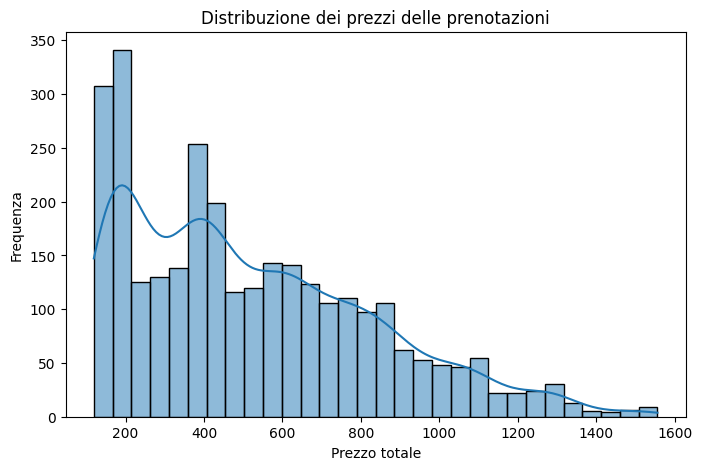

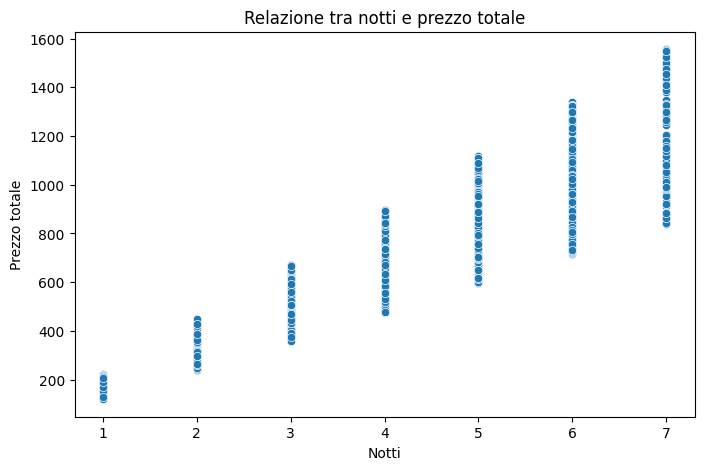

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

df_bookings = spark.table("`ml-gold`.`azure_blob_storage`.`bookings`")
df_pandas = df_bookings.select(
    "total_amount",
    "nights"
).toPandas()

plt.figure(figsize=(8, 5))
sns.histplot(df_pandas["total_amount"], bins=30, kde=True)
plt.title("Distribuzione dei prezzi delle prenotazioni")
plt.xlabel("Prezzo totale")
plt.ylabel("Frequenza")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_pandas,
    x="nights",
    y="total_amount"
)
plt.title("Relazione tra notti e prezzo totale")
plt.xlabel("Notti")
plt.ylabel("Prezzo totale")
plt.show()

In [0]:
import warnings
import os
import pandas as pd
import numpy as np
from pyspark.sql.functions import year, month, datediff, col
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Ignora gli avvisi per un output più pulito
warnings.filterwarnings("ignore")

# Sopprime l'errore di threadpoolctl
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

# 1. Preparazione e conversione dei dati
df_rooms = spark.table("`ml-gold`.`azure_blob_storage`.`rooms`")
df_merged = df_bookings.join(
    df_rooms, 
    on="room_id", 
    how="left"
)
df_final = df_merged.withColumn(
    "month", 
    month(col("checkin_date"))
).withColumn(
    "nights", 
    datediff(col("checkout_date"), col("checkin_date"))
)
df_model_ready = df_final.select(
    "nights", 
    "max_occupancy", 
    "room_type_code", 
    "month", 
    "total_amount",
    "booking_id"
).na.drop()
pandas_df = df_model_ready.toPandas()

# 2. Codifica della colonna categorica e preparazione delle feature
le = LabelEncoder()
pandas_df['room_type_code_encoded'] = le.fit_transform(pandas_df['room_type_code'])
features = pandas_df[['nights', 'max_occupancy', 'room_type_code_encoded', 'month']]
target = pandas_df['total_amount']

# 3. Addestramento del modello
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Valutazione e previsione sul set completo di dati
predictions_test = model.predict(X_test)
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)
print(f"Errore Quadrato Medio (MSE) del modello: {mse}")
print(f"R-quadro (R²) del modello: {r2}")
print("Modello di regressione addestrato e valutato con successo.")

# 5. Aggiunta della colonna delle previsioni al DataFrame originale
pandas_df['predicted_price'] = model.predict(features)

# 6. Visualizzazione dei risultati
display(pandas_df[['total_amount', 'predicted_price']].head())
spark_df_with_predictions = spark.createDataFrame(pandas_df)
display(spark_df_with_predictions.limit(5))

Errore Quadrato Medio (MSE) del modello: 12722.636272312131
R-quadro (R²) del modello: 0.8655183665116661
Modello di regressione addestrato e valutato con successo.


total_amount,predicted_price
182.47,173.9105294684704
371.14,349.85781001051305
183.57,167.26460943247238
947.63,805.5092218684092
477.52,670.8715813047077


nights,max_occupancy,room_type_code,month,total_amount,booking_id,room_type_code_encoded,predicted_price
1,3,DLX,2,182.47,B001711,0,173.9105294684704
2,4,STE,6,371.14,B005500,2,349.85781001051305
1,2,STD,6,183.57,B003364,1,167.26460943247238
5,2,STD,1,947.63,B005875,1,805.5092218684092
4,2,STD,5,477.52,B003694,1,670.8715813047077


In [0]:
%sql
CREATE VOLUME IF NOT EXISTS `ml-gold`.`azure_blob_storage`.ml_models;

In [0]:
import joblib
import os

# Il percorso del volume creato con il comando SQL
volume_path = "/Volumes/ml-gold/azure_blob_storage/ml_models"

# Salva il modello direttamente nel percorso del volume
# Non c'è bisogno di os.makedirs()
model_path = os.path.join(volume_path, "random_forest_model.joblib")

joblib.dump(model, model_path)

print(f"Modello salvato con successo in: {model_path}")

Modello salvato con successo in: /Volumes/ml-gold/azure_blob_storage/ml_models/random_forest_model.joblib
